# PTS Distance Method Visualization

In [1]:
import pandas as pd
from Helpers.FunctHelpers import *
from Helpers.PlotHelpers import *

In [2]:
# Download data

tickers = pd.read_excel('Data/SandP500list.xlsx')
tickers = tickers[tickers['sector'] == 'Financials']
names = tickers['symbol'].tolist()

start_date = pd.to_datetime('2022-01-01') # train 12 months
end_date = pd.to_datetime('2023-07-01') # test 6 months

data = download_data(names, start_date, end_date)

[*********************100%***********************]  65 of 65 completed


6 Failed downloads:
['FRC', 'WLTW', 'PBCT', 'BRK.B', 'RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
['SIVB']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [3]:
# Split into train and test data

train_start = pd.to_datetime('2022-01-01')
train_end = pd.to_datetime('2022-12-31')
test_start = pd.to_datetime('2023-01-01')
test_end = pd.to_datetime('2023-07-01')

train_data, test_data = train_test_split(data, train_start, train_end, test_start, test_end)
print(train_data.shape, test_data.shape)

(251, 59) (124, 59)


In [4]:
# Calculate SSD and select 20 pairs with lowest SSD

train_data_cum = train_data.pct_change().cumsum().dropna(axis=0)

ssd_train = find_ssd(train_data_cum)
pairs = select_lowest_ssd(ssd_train, train_data_cum)

print(f'Choosen pairs: {len(pairs)} from {round(len(data.columns) * (len(data.columns) - 1) / 2)} posssible pairs')

Choosen pairs: 20 from 1711 posssible pairs


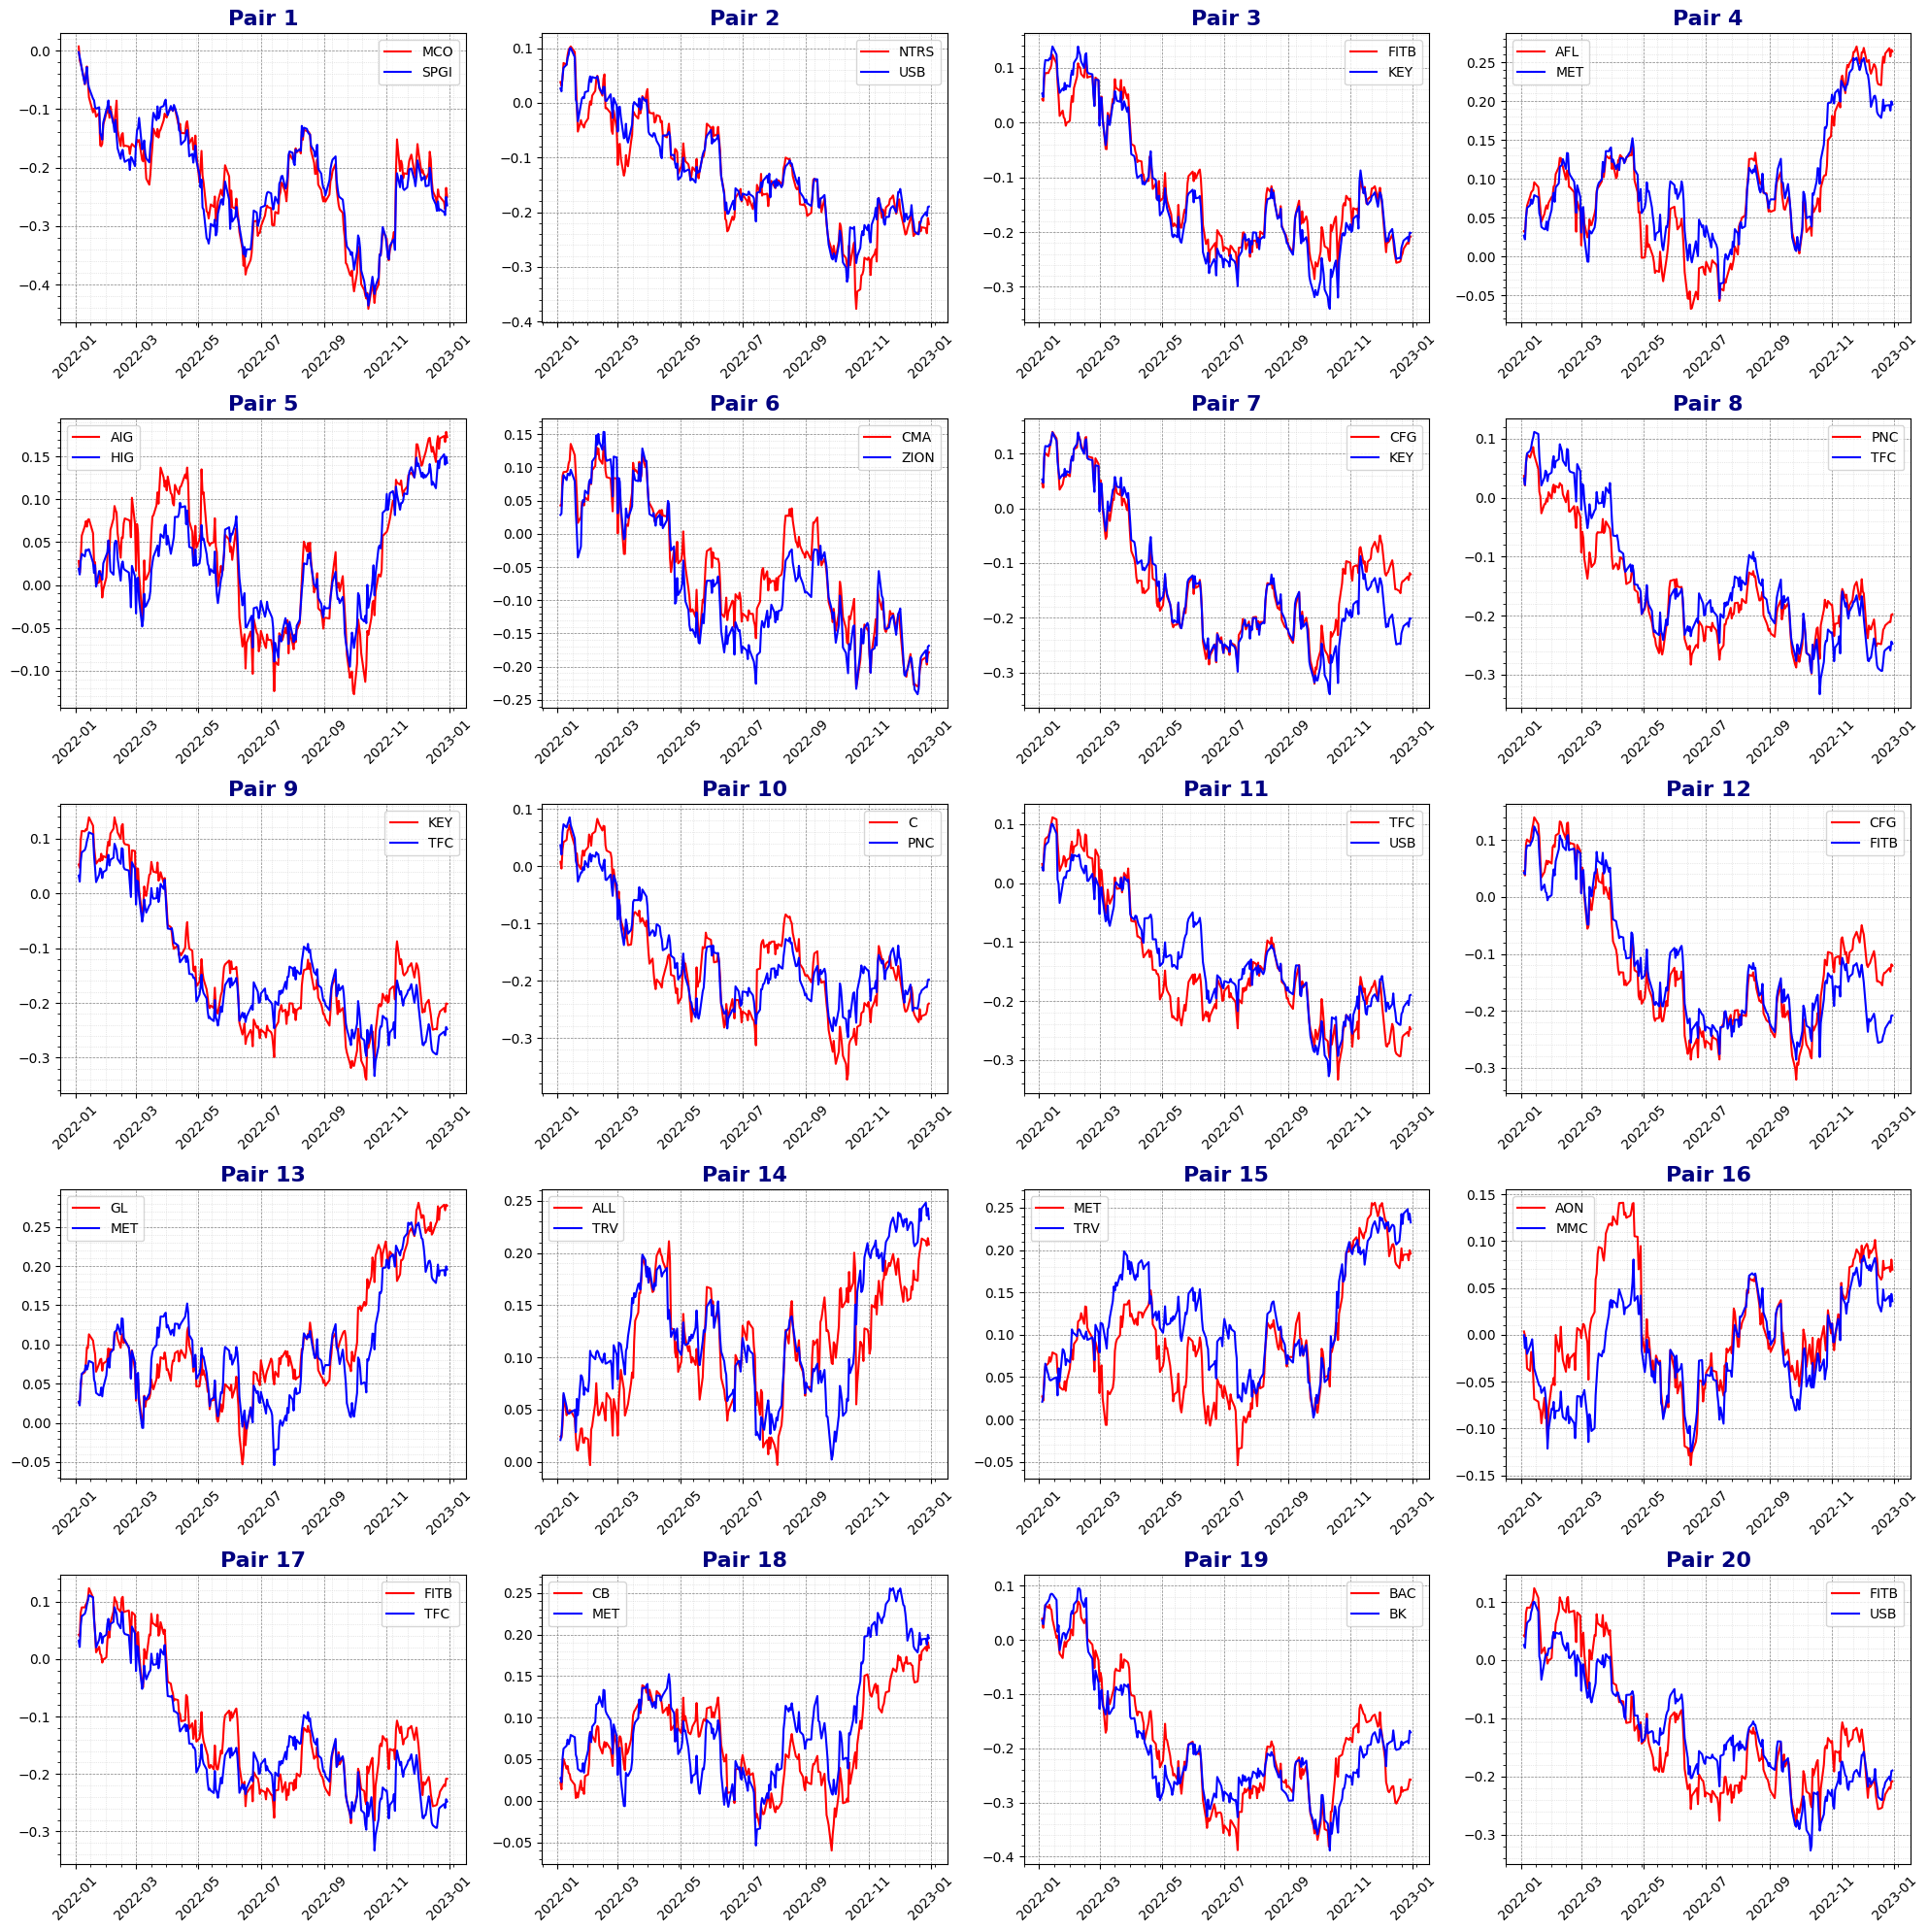

In [5]:
plot_min_ssd_pairs(pairs, train_data_cum)

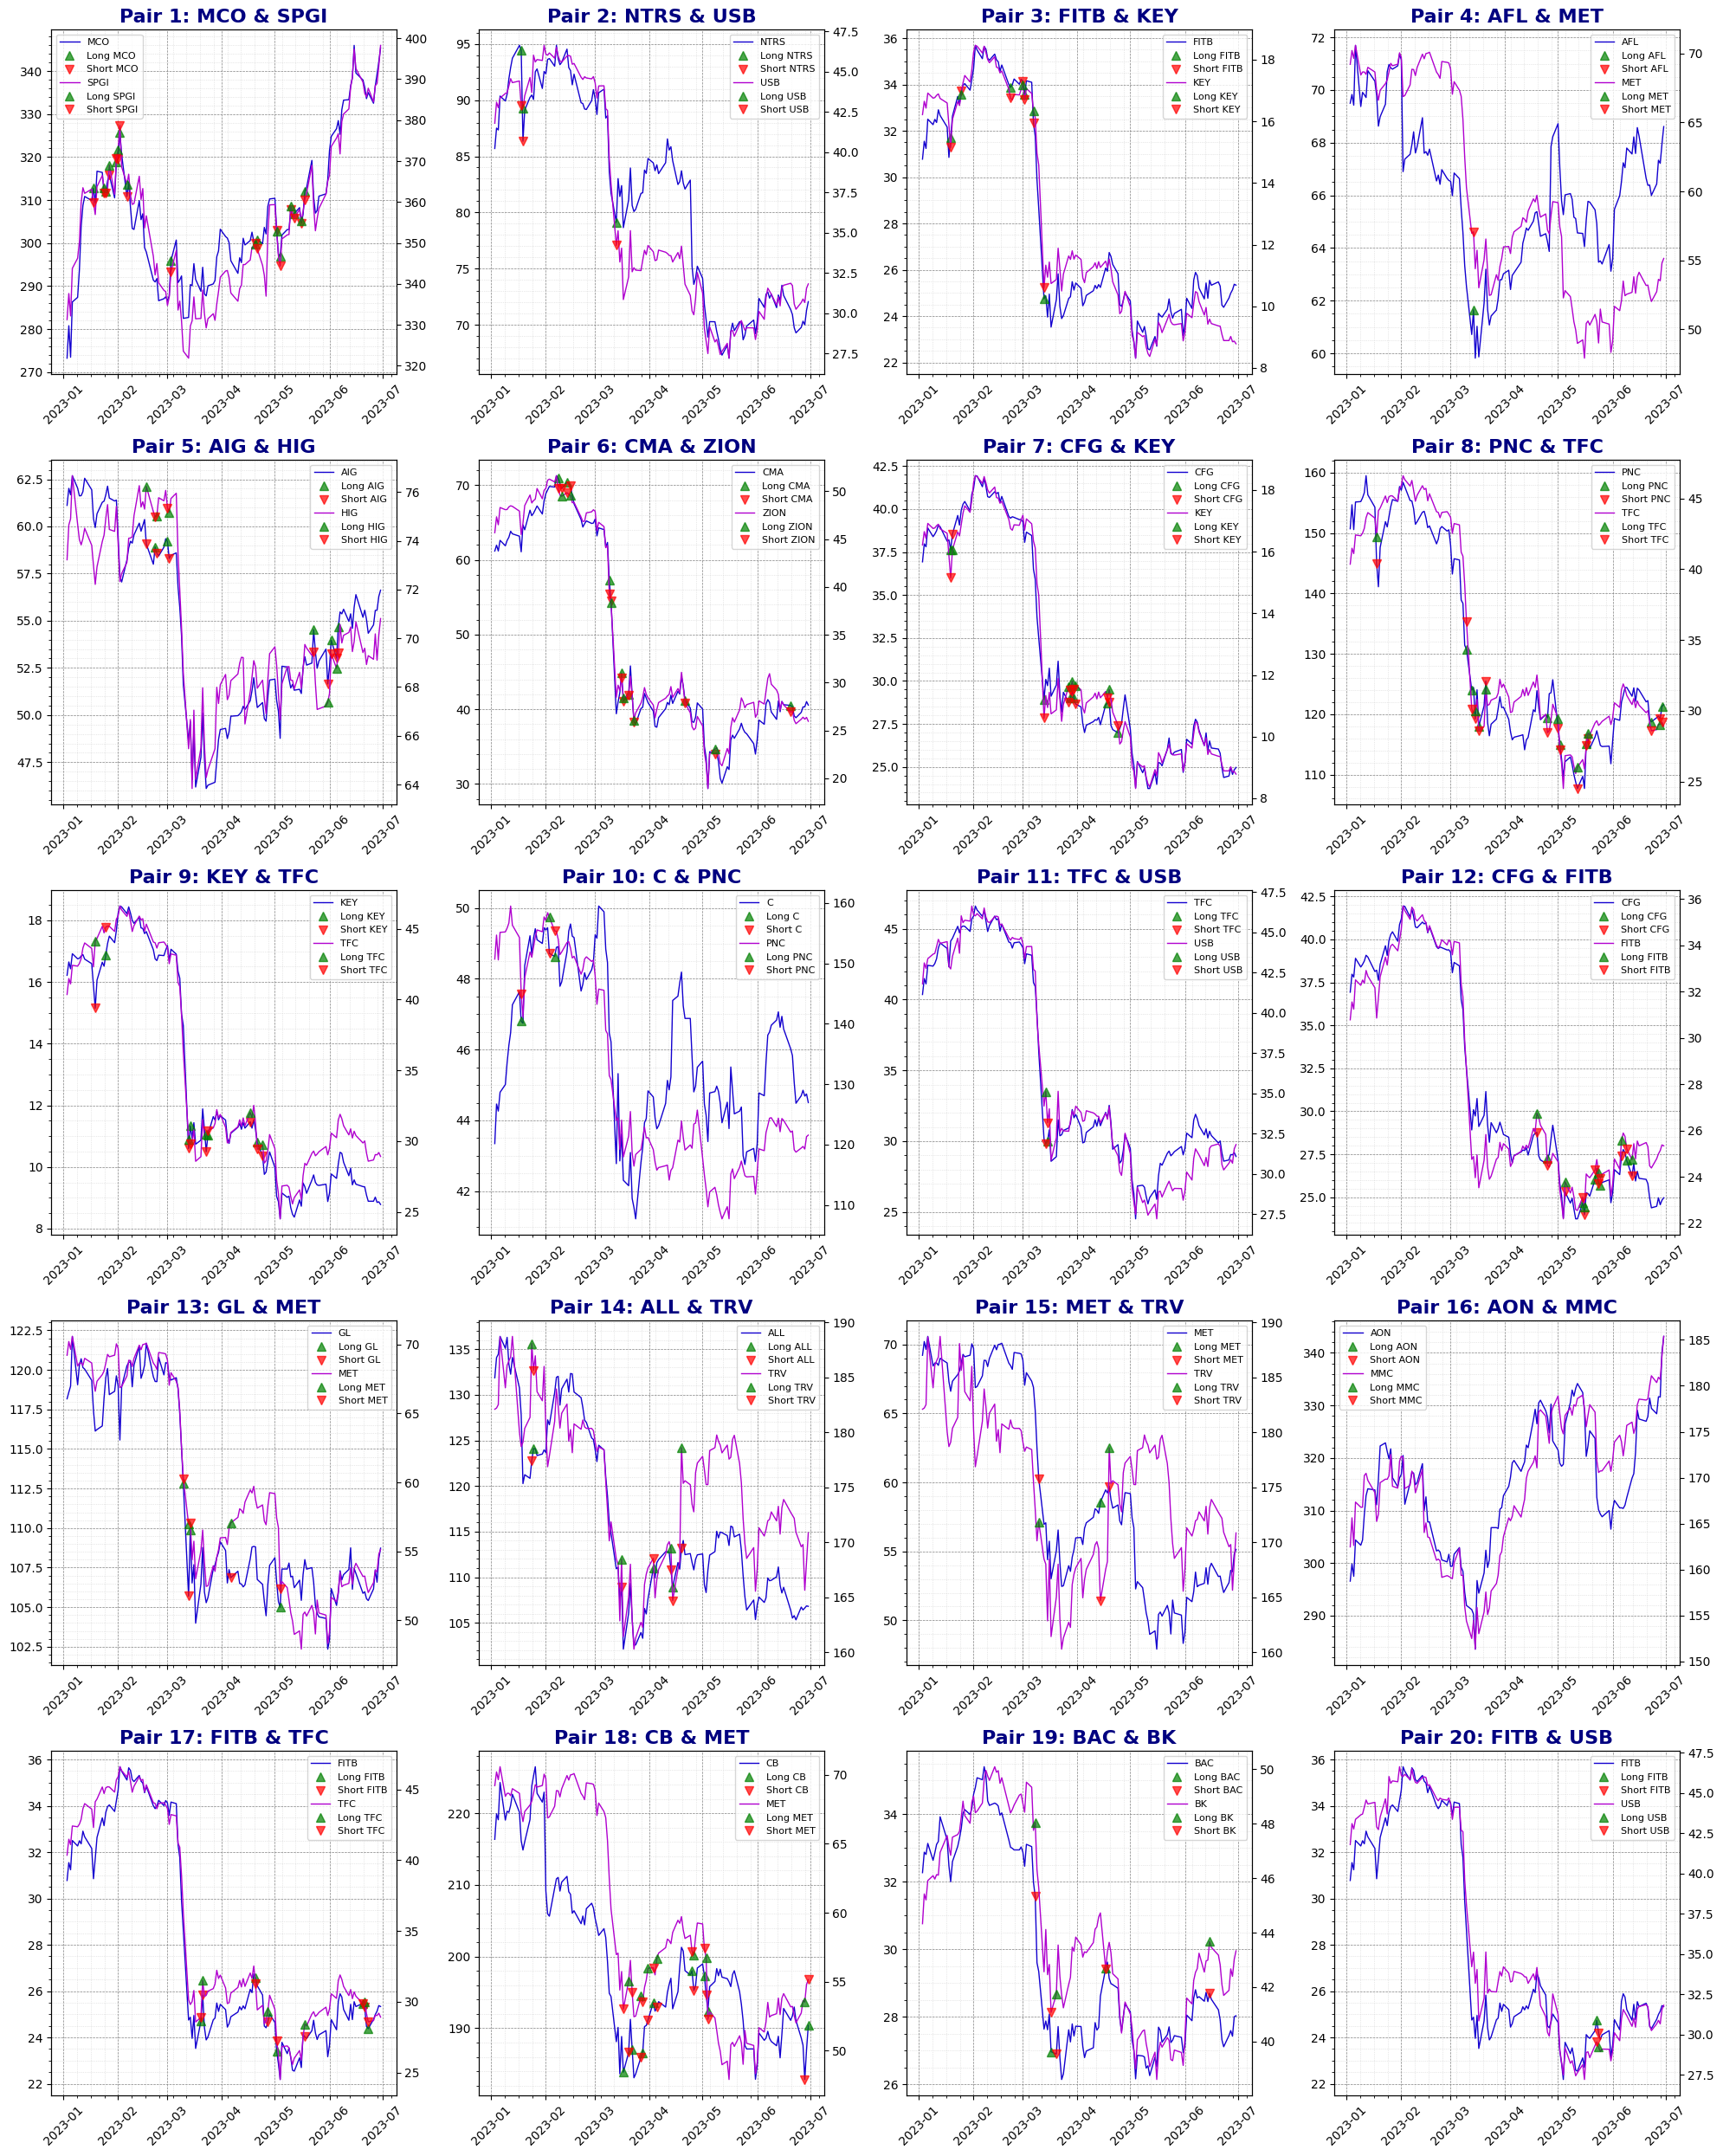

In [6]:
# Find standard deviation of spread and get trading signals

train_spread_std_dev = find_std_dev_spread(train_data_cum, pairs)
all_pair_signals = get_trading_signals_dm(test_data, pairs, train_spread_std_dev)

#plot_signals_pairs(all_pair_signals, pairs)
plot_signals_prices_pairs(test_data, all_pair_signals, pairs)

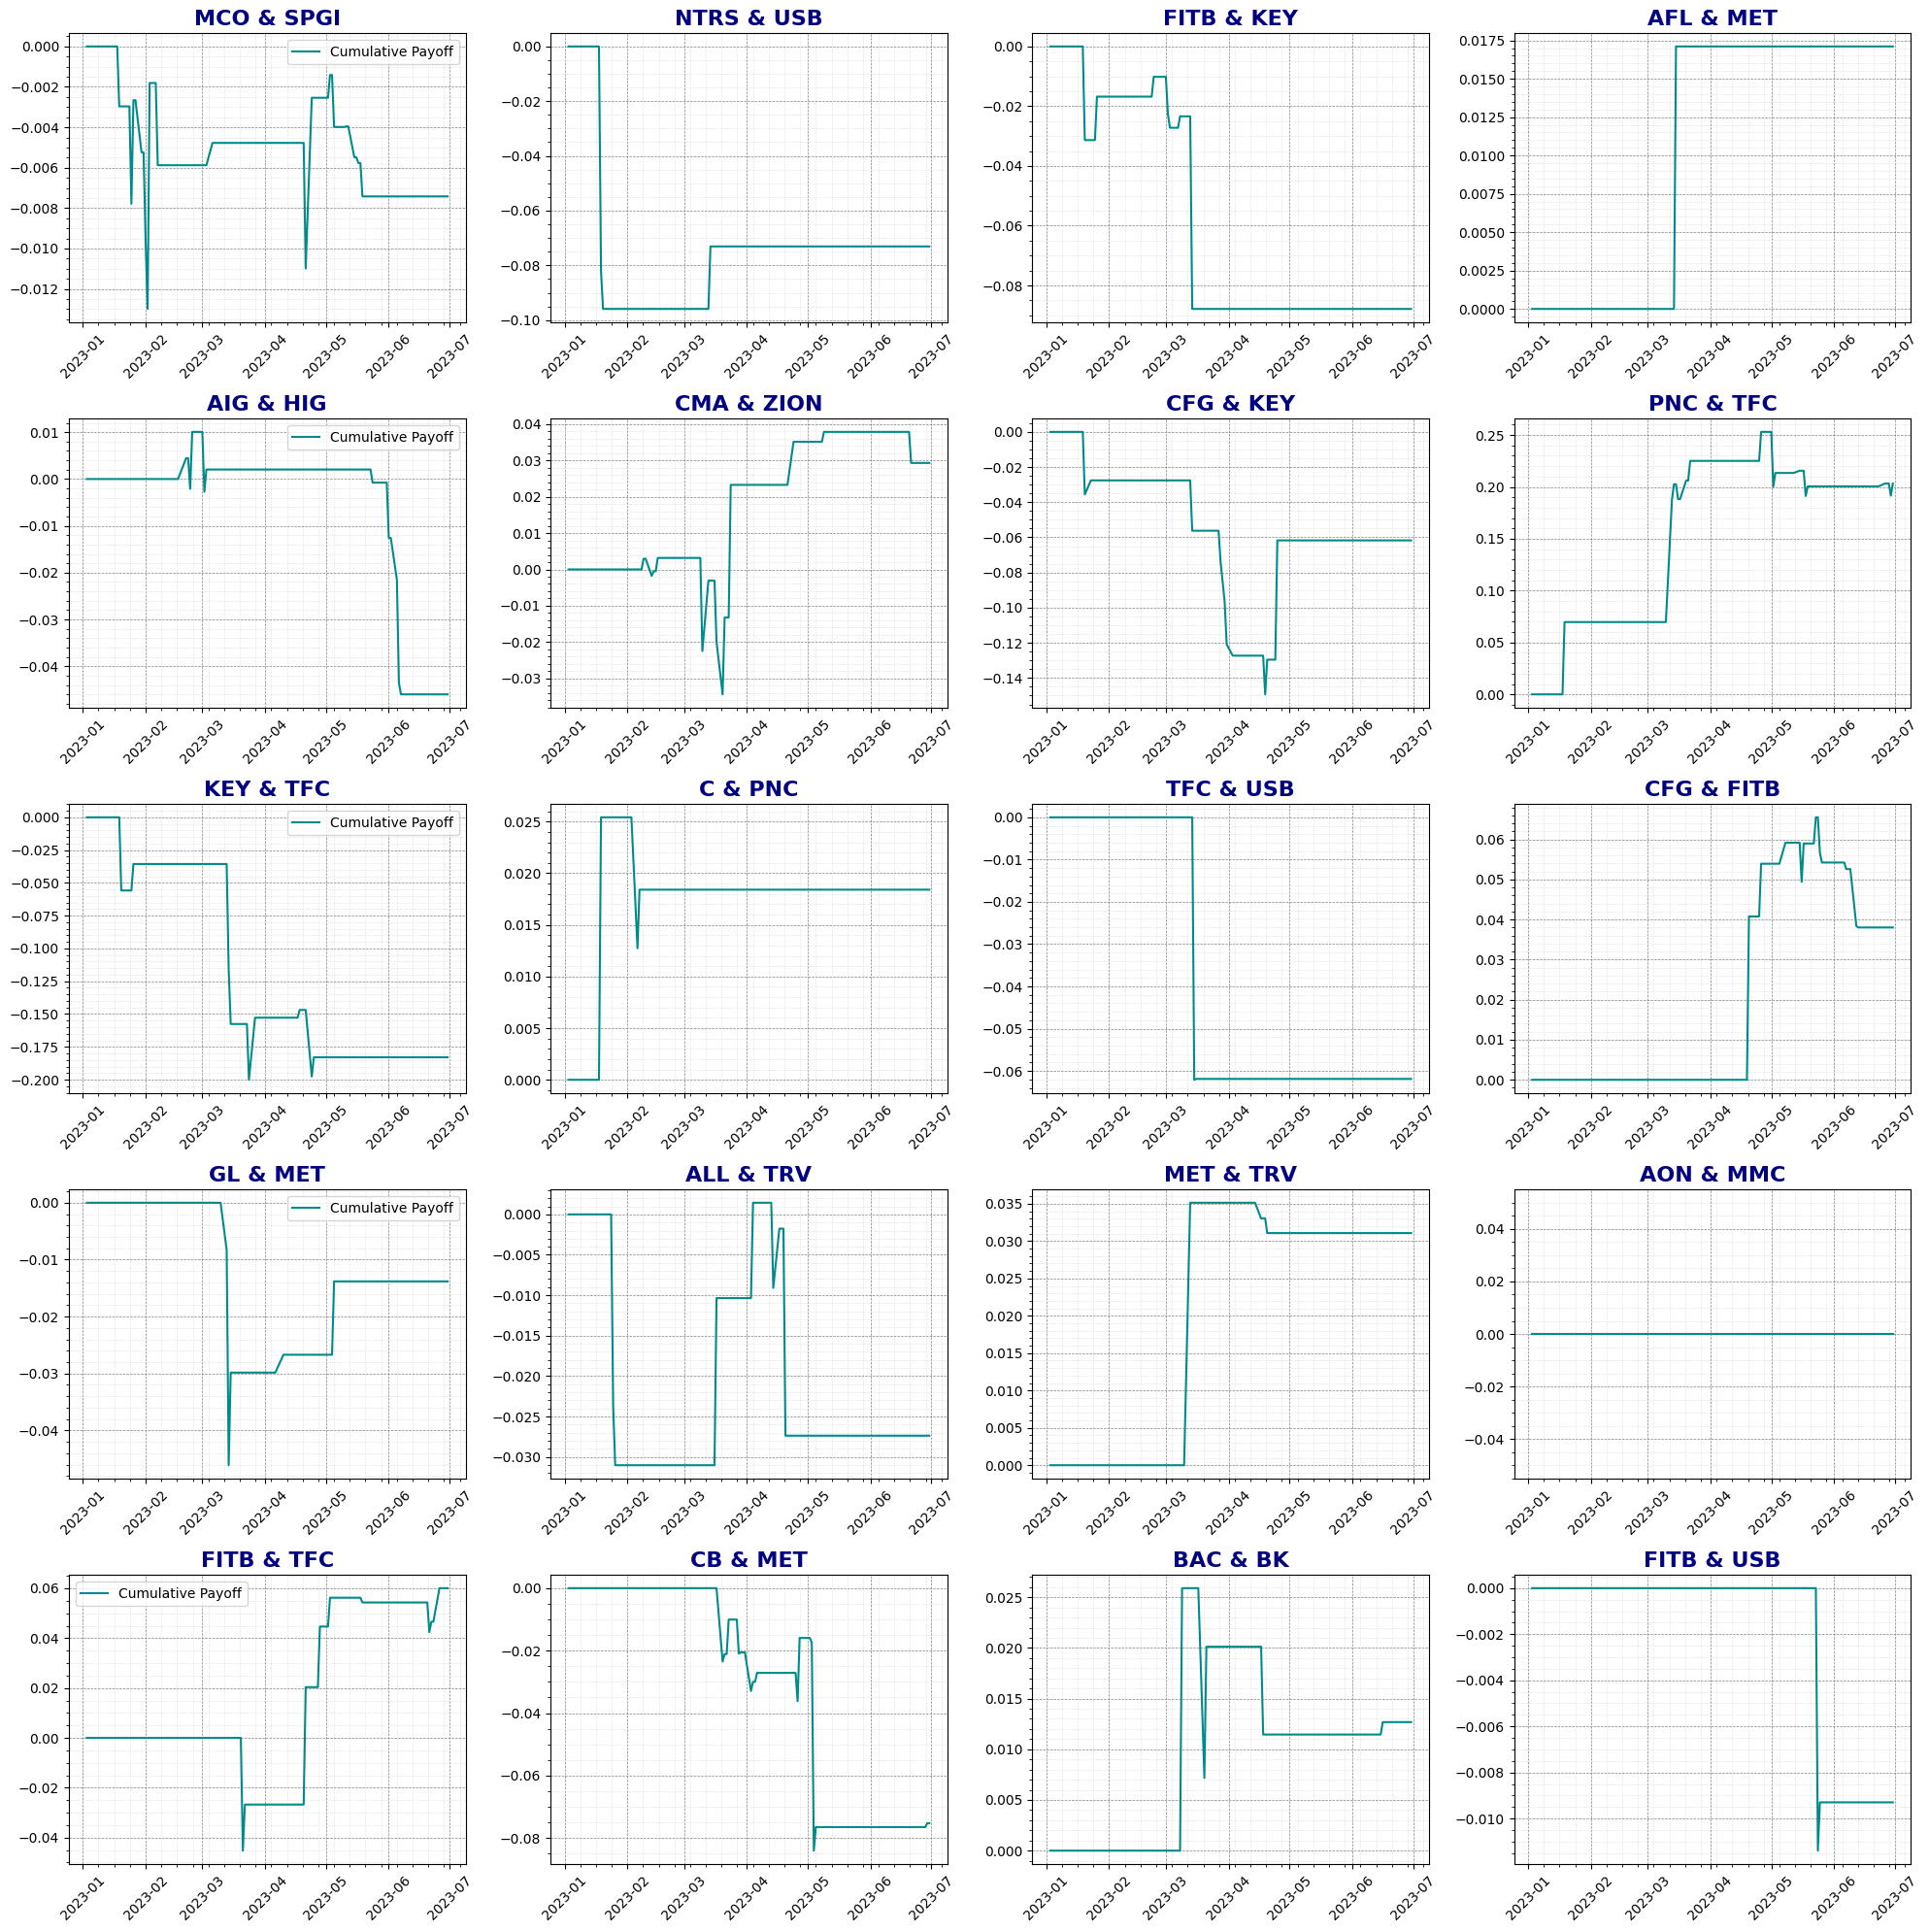

In [7]:
# Plot payoffs of each individual pair

plot_cumulative_payoff_idividual(test_data, all_pair_signals, pairs)

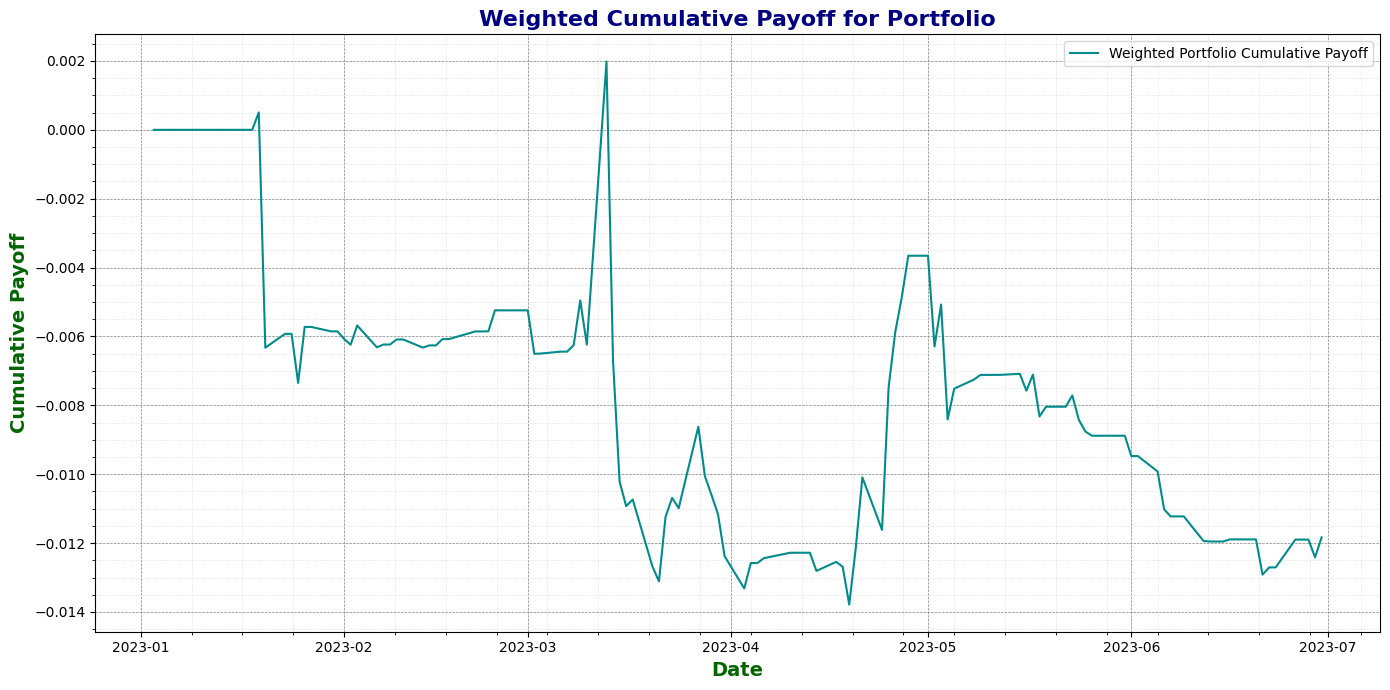

In [8]:
# Plot payoffs of portfolio with equal weights

weights = equal_weighing_scheme(pairs)
plot_cumulative_payoff_portfolio_weighted(test_data, all_pair_signals, pairs, weights)